In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
len(classes)

10

In [3]:
from tensorflow.keras import datasets
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_test = X_test / 255
X_train = X_train / 255

In [10]:
from tensorflow.keras import models, layers
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='sigmoid')
]
)

In [15]:
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.8150 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.6247 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 113s 73ms/step - loss: 1.5437 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.4823 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4336 - accuracy: 0.4967


In [18]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 8s 26ms/step


In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=40, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
    ]
  )

In [26]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5313 - accuracy: 0.4449
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1799 - accuracy: 0.5861
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.0618 - accuracy: 0.6288
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9879 - accuracy: 0.6550
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9326 - accuracy: 0.6752
Epoch 6/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8879 - accuracy: 0.6932
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8563 - accuracy: 0.7037
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8249 - accuracy: 0.7134
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8015 - accuracy: 0.7202
Epoch 10/10
1563/1563 [==============================] - 48s 31m

In [28]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9228 - accuracy: 0.6876


[0.922760546207428, 0.6876000165939331]

In [29]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 8ms/step


# Test

In [32]:
import numpy as np
y_classes = [np.argmax(e) for e in y_pred]

classes[y_classes[3]]

'airplane'

In [33]:
y_train[3]

array([4], dtype=uint8)

Text(0.5, 0, 'airplane')

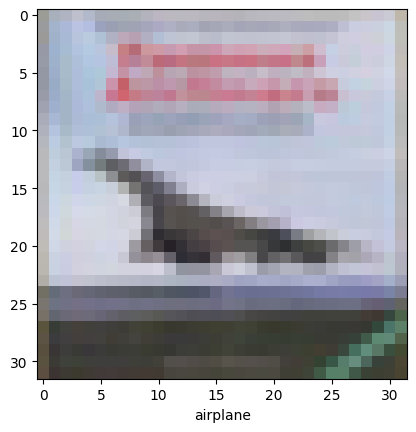

In [47]:
import matplotlib.pyplot as plt
plt.imshow(X_test[3])
plt.xlabel(classes[y_test[3]])